# Question 1: Part 1)
Implement Lasso regression also known as L1 regularisation and plot graph between regularisation coefficient λ and error

In [199]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

Read the data set, drop serial number and chance of admit from it and add column of all 1's.
Create initial theta of size 8 (7 coulumns + 1 for interceot), initialized by all zeros. 

In [200]:
filename="./AdmissionDataset/data.csv"
data = pd.read_csv(filename)
data = data.sample(frac=1)

def normalise(data,columns):
    for i in columns:
        mean=data[i].mean()
        std=data[i].std()
        data[i]=(data[i]-mean)/std
    return data

columns=['GRE Score','TOEFL Score','University Rating','SOP','LOR ' ,'CGPA','Research']
data=normalise(data,columns)

data.insert(0,'all_ones',1)

train, validate = np.split(data,[int(.8*len(data))])
train=train.drop(['Serial No.'],axis=1)

yactual=train['Chance of Admit ']

temp_train=train
train=train.drop(['Chance of Admit '],axis=1)

y_validate=validate['Chance of Admit ']
validate=validate.drop(['Serial No.'],axis=1)
temp_validate=validate
validate=validate.drop(['Chance of Admit '],axis=1)


theta=np.zeros(8)#7 for columns + 1 for beta0

For each labmda value ranging from 0.1 to 50, with step size 0.1, train the model using gradient decent for 1000 iterations using the formula: 

    

$$\theta_j := \theta_j - \alpha.1/m \Sigma (h_\theta (x ^ {(i)} ) - y ^{(i)} ) x_j ^ {(i)} - \alpha *\lambda *sign(w_j) /2m$$

Find the error for each lambda, that this trained theta is causing using MSE formula:


$$MSE = \displaystyle\frac{1}{n}\sum_{t=1}^{n}e_t^2 $$

In [201]:
def gradientDescent(x,yactual,theta,alpha):
    num_of_rows,cols=np.shape(x)
    col_length=np.shape(theta)
    error_list=[]
    lambda_list=[]
    lambda_log=[]
    theta_list=[] #store theta corresponding to each lambda value use it for validation
    x=np.array(x)
    lambda_val=0.1
    while lambda_val<50:
        theta=np.zeros(col_length[0])#for training, for each lambda value, theta would be made zero(start afresh for each lambda)
        for i in range(0,1000):
            pred=np.dot(x,theta.T)
            loss_value = pred - yactual
            gradient_0=np.dot(x[:,0],loss_value)
            theta[0]=theta[0]-(alpha*(gradient_0/num_of_rows))
            for j in range(1,col_length[0]):
                gradient=np.dot(x[:,j],loss_value)
                lamda_part=(lambda_val*np.sign(theta[j]))/2  #np.abs(theta[j]) due to lasso
                theta[j]=theta[j] - (alpha * ((gradient+lamda_part)/(num_of_rows)))
        theta_list.append(theta)#store the theta value you get after training over a lambda value
        lamda_y_pred=np.dot(x,theta)
        loss=np.sum((lamda_y_pred-yactual)**2)/(2*num_of_rows)
        error_list.append(loss)
        lambda_list.append(lambda_val)
        lambda_log.append(np.log(lambda_val))
        lambda_val+=0.1
    return theta_list,error_list,lambda_list,lambda_log

Call gradient decent for training data, and find theta corresponding to each lambda

In [202]:
theta_list,error_list,lambda_list,lambda_log=gradientDescent(train,yactual,theta,0.001)

Find the error for each lambda and corresponding theta values, over testing data.

In [204]:
def validate_error_list(theta_list,validate,y_validate,lambda_list):
    error_list=[]
    num_of_rows,cols=np.shape(validate)
    for i in range(len(theta_list)):
        theta=theta_list[i]
        lamda_y_pred=np.dot(validate,theta)
        loss = np.sum((lamda_y_pred-y_validate)**2)/(num_of_rows)#+(lambda_list[i]*np.sum(np.abs(theta)))/num_of_rows
        error_list.append(loss)
    return error_list

error=validate_error_list(theta_list,validate,y_validate,lambda_list)


Plot graph

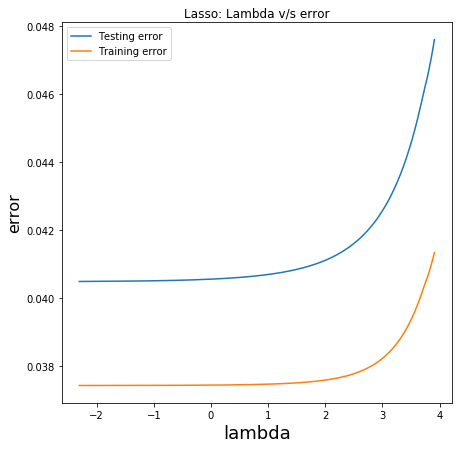

In [209]:
plt.figure(figsize=(7,7))
plt.xlabel('lambda', fontsize=18)
plt.ylabel('error', fontsize=16)
plt.title("Lasso: Lambda v/s error")
plt.plot(lambda_log,error,label='Testing error')
plt.plot(lambda_log,error_list,label='Training error')
plt.legend(loc='best')